In [21]:
# a reference to the pandas library
import pandas as pd

# To visualize the data we need mytplotlib
# and seaborn for nice pairplots
import matplotlib.pyplot as plt  
import seaborn as sns

# statsmodel will do the linear regression for us
import statsmodels.api as sm

# second library we can use for linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# the excel file must be in the same directory as this notebook
# be sure to use the right excel data file.
# This one is the customer excel file for building the model
catalog_customers_file= 'p1-customers.xlsx'

# via pandas, the contents ae read into a variable or data frame named catalog_customers_data
# pandas is able not to only read excel, but does a great job on csv, too.
catalog_customers_data = pd.read_excel(catalog_customers_file)

# now I know I can show the data by typing the variable name
catalog_customers_data



,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7


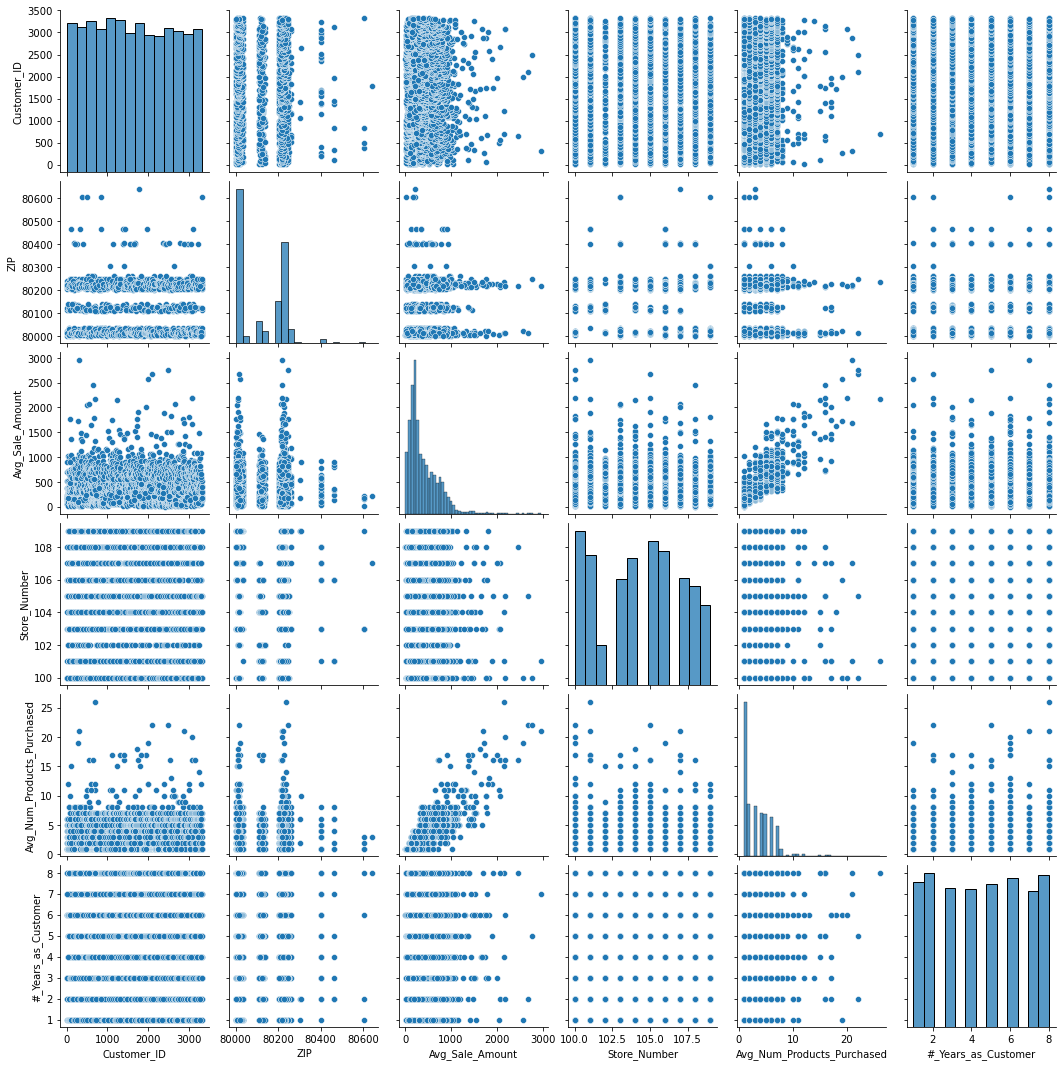

In [7]:
# with a seaborn pairplot, we can check for linear relationship
# in each and every combination of the data columns.
# as we can see, the only relationship seems to be between
# Avg_Sales_Amount and Avg_Num_Products_Purchased

sns.pairplot(catalog_customers_data)
plt.show()

In [73]:
# We drop the columns without statistical significance from our dataset
cleaned_customers_data = catalog_customers_data.drop(['Customer_ID', 'ZIP', 'Store_Number', '#_Years_as_Customer'], axis=1)
#we also can drop the nominal data without significance as described in analysis section
cleaned_customers_data = cleaned_customers_data.drop(['Name', 'Address', 'City', 'State', 'Responded_to_Last_Catalog'], axis=1)

# we still have nominal data in the dataset, namely Customer_Segment
# As this column is relevant for us, we have to create dummy variables
# and we have to drop "Credit card only" as stated in the task description
cleaned_customers_data = pd.get_dummies(cleaned_customers_data, columns=['Customer_Segment'], drop_first=True)

# set the target variable
Y = cleaned_customers_data['Avg_Sale_Amount']
# set the predictor variables
X = cleaned_customers_data.drop(['Avg_Sale_Amount'], axis=1)

# let's to the evaluation with statsmodels
# we have to add a constant to the calculation or
# we do not have a Y-intercept
X = sm.add_constant(X)

# build the model
model = sm.OLS(Y,X).fit()
model_prediction = model.predict(X)
model_details = model.summary()

# print the details, so we can compare to alteryx
model_details

X

,const,Avg_Num_Products_Purchased,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,1.0,1,0,0,1
1,1.0,1,0,0,1
2,1.0,1,0,0,1
3,1.0,1,0,0,1
4,1.0,1,0,0,1
...,...,...,...,...,...
2370,1.0,5,0,0,0
2371,1.0,6,0,0,0
2372,1.0,6,0,0,0
2373,1.0,7,0,0,0


In [85]:
# Now we have a working model, we can use the data from
# p1-mailinglist.xlsx to test the model and to make a prediction
catalog_test_file = "p1-mailinglist.xlsx"
catalog_test_data = pd.read_excel(catalog_test_file)

# see above
cleaned_test_data = pd.get_dummies(catalog_test_data, columns=['Customer_Segment'], drop_first=True)
cleaned_test_data = cleaned_test_data.drop(['Customer_ID', 'ZIP', 'Store_Number', '#_Years_as_Customer'], axis=1)
cleaned_test_data = cleaned_test_data.drop(['Name', 'Address', 'City', 'State'], axis=1)

# even if we know we need Score_Yes amd Score_No. these columns are not present in the customer dataset
# so a correlation between the model data and the test data will not work
# alteryx can do this automatically, we have to get our hands dirty
cleaned_test_data1 = cleaned_test_data.drop(['Score_Yes', 'Score_No'], axis=1)

# set the predictor variables
X_test = cleaned_test_data1

# let's to the evaluation with statsmodels
# we have to add a constant to the calculation or
# we do not have a Y-intercept
X_test = sm.add_constant(X_test)


# and make a prediction with the test data
model_prediction_test = model.predict(X_test)

# we have to make a prediction according to the value of Score_Yes
# so let's read the score values again and add them to the model
score = pd.read_excel('p1-mailinglist.xlsx', usecols=['Score_Yes'])

# add the model to the data frame
score['Predicted_Sales'] = model_prediction_test

# show the results
score


,Score_Yes,Predicted_Sales
0,0.305036,355.036364
1,0.472725,987.159466
2,0.578882,622.941184
3,0.305138,288.060159
4,0.387706,422.012569
...,...,...
245,0.216194,1509.035160
246,0.192800,355.036364
247,0.423456,555.964979
248,0.259251,772.296906


In [108]:
# now we do the evaluation

print("Catalog marketing campaign results")
print("----------------------------------\n")

total_revenue = sum(score['Predicted_Sales']*score['Score_Yes'])
print("Total expected revenue from the marketing campaign: ", '${:,.2f}'.format(total_revenue))

adjusted_revenue = total_revenue * 0.5
print("Applying gross margin of 50%: ", '${:,.2f}'.format(adjusted_revenue))

number_customers = score.shape[0]
print_costs = 6.5
catalog_costs = print_costs * number_customers
print("Print costs are $6.5 x", number_customers, "customer(s):", '${:,.2f}'.format(catalog_costs))

print("")
expected_profit = adjusted_revenue - catalog_costs
print("The expected profit from the marketing campaign is:", '${:,.2f}'.format(expected_profit))

if (expected_profit > 10000):
    print("Recommendation: GO! We should do the campaign.")
else:    
    print("Recommendation: NO GO! We should not do the campaign.")


Catalog marketing campaign results
----------------------------------

Total expected revenue from the marketing campaign:  $47,224.87
Applying gross margin of 50%:  $23,612.44
Print costs are $6.5 x 250 customer(s): $1,625.00

The expected profit from the marketing campaign is: $21,987.44
Recommendation: GO! We should do the campaign.
